In [856]:
#Importando todas as bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [857]:
test_csv = "test.csv"
train_csv = "train.csv"

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

#Analisando o Dataframe de treino:

In [858]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


O dataframe está muito poluído. Além disso, possui diversos valores em string, que não contribuem para o método de predição que pretendo usar. Nesse sentido, limparei as informações e exibirei um heatmap das informações que não forem dropadas.

<Axes: >

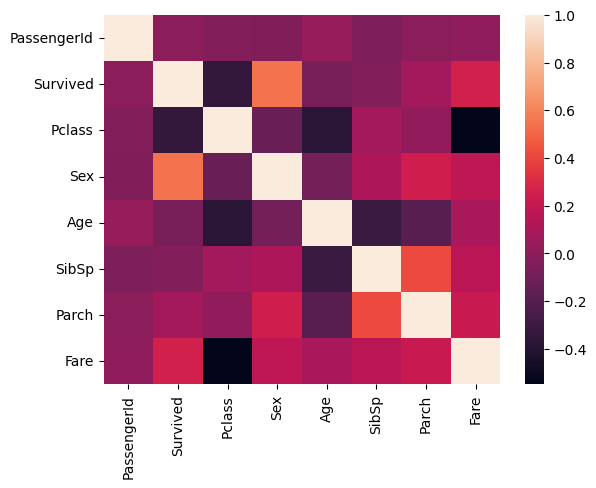

In [859]:
columns_drop = ["Name", "Ticket", "Cabin", "Embarked"]
train_df.drop(columns_drop, axis=1, inplace=True)
train_df["Sex"] = train_df["Sex"].replace({"male": 0, "female": 1}) 
corr = train_df.corr()
plt.figure()

sns.heatmap(data=corr)

Analisando o head da tabela, as únicas informações que parecem ser úteis são: "PassengerId", "Pclass", "Sex", "Age", "Parch" e "Fare". Então é possível dropar todas as informações que não irei usar.

In [860]:
columns = ["Survived", "Pclass", "Sex", "Age", "Parch", "Fare"]

train_df = train_df[columns]
train_df.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,0,22.0,0,7.2500
1,1,1,1,38.0,0,71.2833
2,1,3,1,26.0,0,7.9250
3,1,1,1,35.0,0,53.1000
4,0,3,0,35.0,0,8.0500


A partir disso, é possível iniciar o algorítmo de treinamento.

In [861]:
y = train_df.Survived
X = train_df.drop("Survived", axis=1)

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

print(train_df.head(10))
print(model.predict(X.head(10)))

   Survived  Pclass  Sex   Age  Parch     Fare
0         0       3    0  22.0      0   7.2500
1         1       1    1  38.0      0  71.2833
2         1       3    1  26.0      0   7.9250
3         1       1    1  35.0      0  53.1000
4         0       3    0  35.0      0   8.0500
5         0       3    0   NaN      0   8.4583
6         0       1    0  54.0      0  51.8625
7         0       3    0   2.0      1  21.0750
8         1       3    1  27.0      2  11.1333
9         1       2    1  14.0      0  30.0708
[0 1 1 1 0 0 0 1 1 1]


A partir disso, percebe-se que dos 10 primeiros, o modelo errou somente um. Deve-se verificar a acurácia portanto.

In [862]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

previsoes = model.predict(X_test)

precision = accuracy_score(y_test, previsoes)
print(f'A precisão do modelo é de {precision * 100:.2f}%')

A precisão do modelo é de 78.77%


Como pode-se perceber o resultado foi relativamente abaixo do esperado. Assim, entende-se que os dados utilizados para o modelo não foram suficiente, sinalizando um Underfitting dos dados ou erro na escolhe do modelo. Dessa forma, vou selecionar mais colunas para participarem das features.

In [863]:
train_df2 = pd.read_csv(train_csv)

train_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para tentar adicionar mais dados ao modelo, vou considerar "Cabin" e "Embarked", assim como os dados de irmãos e conjuges.

In [864]:
train_df2["Cabin"] = train_df2["Cabin"].map(lambda x: 0 if pd.isnull(x) else 1)

train_df2["Sex"] = train_df2["Sex"].replace({"male": 0, "female": 1}) 

train_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


Agora ao invés de indicar a cabine, ele informa se há ou não cabine, que pode ser um indiicador de classe social.

In [865]:

train_df2["is_S"] = train_df2["Embarked"].apply(lambda x: 1 if x == "S" else 0)
train_df2["is_C"] = train_df2["Embarked"].apply(lambda x: 1 if x == "C" else 0)
train_df2["is_Q"] = train_df2["Embarked"].apply(lambda x: 1 if x == "Q" else 0)
train_df2.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_S,is_C,is_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,1,0,0


Pronto, agora podemos escolher as features e analisar um novo modelo.

In [866]:

X_2 = train_df2[["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare", "Cabin", "is_S", "is_C", "is_Q"]]
y_2 = train_df2['Survived']


X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y2_train)

previsoes = model.predict(X2_test)

precision = accuracy_score(y2_test, previsoes)
print(f'A precisão do modelo é de {precision * 100:.2f}%')

A precisão do modelo é de 78.77%


Percebe-se que o resultado obtido com essas colunas não foram satisfatórios.

In [867]:

X_2 = train_df2[["Age", "Sex"]]
y_2 = train_df2['Survived']


X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y2_train)

previsoes = model.predict(X2_test)

precision = accuracy_score(y2_test, previsoes)
print(f'A precisão do modelo é de {precision * 100:.2f}%')

A precisão do modelo é de 78.21%


In [868]:

X_2 = train_df2[["Age", "Sex", "Pclass", "Fare", "Cabin"]]
y_2 = train_df2['Survived']


X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X2_train, y2_train)

previsoes = model.predict(X2_test)

precision = accuracy_score(y2_test, previsoes)
print(f'A precisão do modelo é de {precision * 100:.2f}%')

A precisão do modelo é de 78.21%


Dessa forma, mesmo com todas as correlações, o maior resultado que obtive foi de 78,77% de acurácia. Portanto, vamos testar o modelo no df de teste.

In [869]:
#tratando o csv de teste.

test_df["Cabin"] = test_df["Cabin"].map(lambda x: 0 if pd.isnull(x) else 1)


test_df["Sex"] = test_df["Sex"].replace({"male": 0, "female": 1})


test_df["is_S"] = test_df["Embarked"].apply(lambda x: 1 if x == "S" else 0)
test_df["is_C"] = test_df["Embarked"].apply(lambda x: 1 if x == "C" else 0)
test_df["is_Q"] = test_df["Embarked"].apply(lambda x: 1 if x == "Q" else 0)


In [870]:
X_test = test_df[["Age", "Sex", "Pclass", "Fare", "Cabin"]]

predict = model.predict(X_test)

test_df["Survived"] = predict

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_S,is_C,is_Q,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,S,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,S,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,S,1,0,0,0


In [871]:
gabarito_df = pd.read_csv("gender_submission.csv")

gabarito_df = gabarito_df["Survived"]

resultado = accuracy_score(gabarito_df, predict)

print(f'O resultado final é de {resultado * 100:.2f}%')

O resultado final é de 78.23%
